In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from starfish.set import settings

In [3]:
fisher1=pd.read_excel('../data/combined/cmb+pelg+jmul-w0wacdm-free.xlsx',header=0,index_col=0)
fisher2=pd.read_excel('../data/combined/cmb+dmul-w0wacdm-free.xlsx',header=0,index_col=0)
fisher3=pd.read_excel('../data/combined/pelg+jmul-w0wacdm-free.xlsx',header=0,index_col=0)
fisher4=pd.read_excel('../data/DESI_all/valid.xlsx',header=0,index_col=0)

In [4]:
cov1_valid=pd.DataFrame(np.linalg.inv(fisher1.values)[:settings.cosmo_num,:settings.cosmo_num],index=settings.var_name,columns=settings.var_name)
cov2_valid=pd.DataFrame(np.linalg.inv(fisher2.values)[:settings.cosmo_num,:settings.cosmo_num],index=settings.var_name,columns=settings.var_name)
cov3_valid=pd.DataFrame(np.linalg.inv(fisher3.values)[:settings.cosmo_num,:settings.cosmo_num],index=settings.var_name,columns=settings.var_name)
cov4_valid=pd.DataFrame(np.linalg.inv(fisher4.values)[:settings.cosmo_num,:settings.cosmo_num],index=settings.var_name,columns=settings.var_name)

In [5]:
np.sqrt(cov1_valid.loc['w0','w0']),np.sqrt(cov1_valid.loc['wa','wa'])

(0.044455756146126804, 0.18008868983341034)

In [6]:
np.sqrt(cov2_valid.loc['w0','w0']),np.sqrt(cov2_valid.loc['wa','wa'])

(0.028519461862215247, 0.1048970274679746)

In [7]:
from getdist import plots
from getdist.gaussian_mixtures import GaussianND

gauss1 = []
for cov in  [cov3_valid,cov4_valid]:
    g = GaussianND(settings.cosmo_value, cov, is_inv_cov=False, names=settings.var_exp)
    g.paramNames.names[-4].name = r"$\sum m_\nu\;[\mathrm{eV}]$"
    g.paramNames.names[-4].label = ""
    g.names = settings.var_exp[:settings.cosmo_num]
    gauss1.append(g)

In [8]:
gauss2 = []
for cov in  [cov1_valid,cov2_valid]:
    g = GaussianND(settings.cosmo_value, cov, is_inv_cov=False, names=settings.var_exp)
    g.paramNames.names[-4].name = r"$\sum m_\nu\;[\mathrm{eV}]$"
    g.paramNames.names[-4].label = ""
    g.names = settings.var_exp[:settings.cosmo_num]
    gauss2.append(g)

In [9]:
palette=sns.color_palette(['chocolate','mediumseagreen',])
palette

[(0.8235294117647058, 0.4117647058823529, 0.11764705882352941),
 (0.23529411764705882, 0.7019607843137254, 0.44313725490196076)]

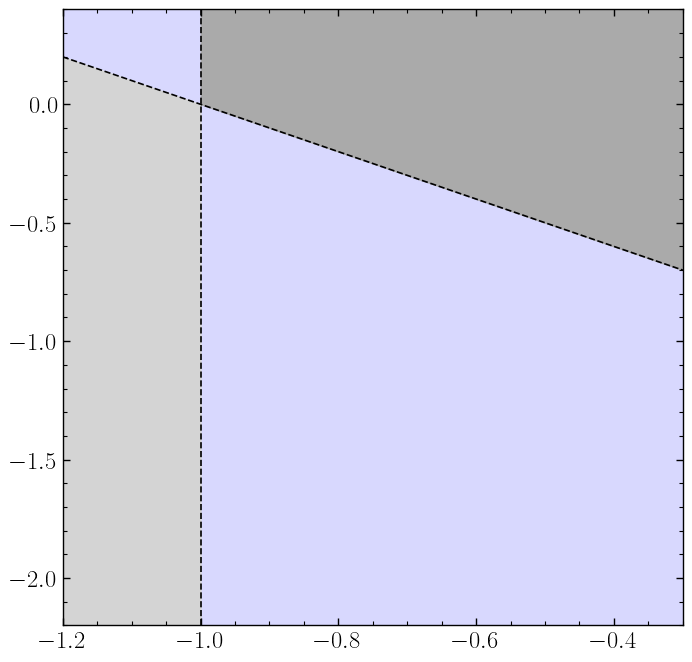

In [10]:
sns.set_context('paper',font_scale=2)
fig,ax=plt.subplots()
fig.set_size_inches((8,8))
ax.minorticks_on()
ax.tick_params(which='major',length=5,direction='in',top=True,right=True)
ax.tick_params(which='minor',length=3,direction='in',top=True,right=True)
xl,xr=-1.2,-0.3
yl,yr=-2.2,0.4
ax.set_xlim(xl,xr)
ax.set_ylim(yl,yr)
ax.axvline(-1,ls='--',c='k')
w0=np.linspace(xl,xr,100)
ax.plot(w0,-1-w0,ls='--',c='k')
ax.fill_betweenx([yr,0],[-1-yr,-1],[-1,-1],color='#d8d8fe')
ax.fill_betweenx([0,yl],[-1,-1-yl],[-1,-1],color='#d8d8fe')
ax.fill_between([xl,-1],[-1-xl,0],yl,color='#d4d4d4')
ax.fill_between([-1,xr],[0,-1-xr],yr,color='#aaaaaa')

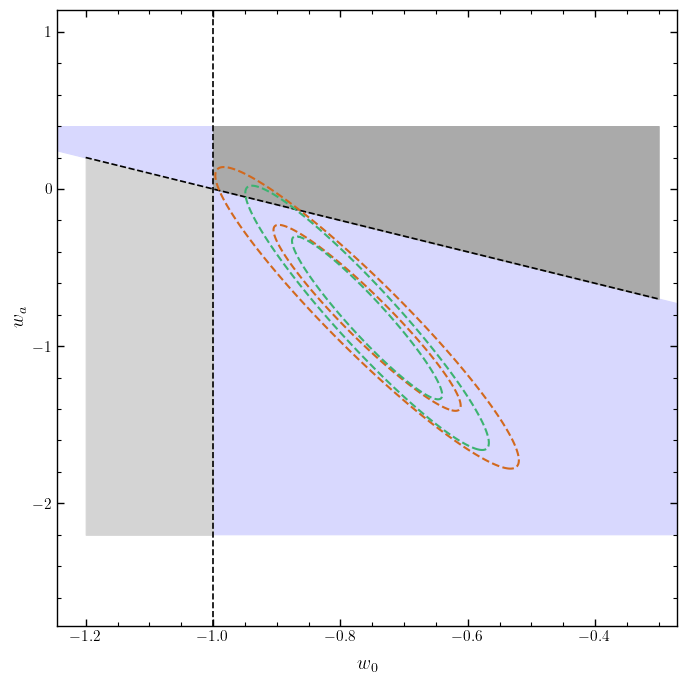

<Figure size 600x450 with 0 Axes>

In [11]:
ploter=plots.get_single_plotter()
ploter.settings.tight_layout=True
ploter.settings.figure_legend_frame=False
ploter.plot_2d(
    gauss1,
    param_pair=[r'$w_0$',r'$w_a$'],
    filled=False,
    ls=['dashed','dashed'],
    colors=palette,
    lws=[1.5,1.5],
    legend_loc='upper right',
    ax=ax)
from IPython.display import display
display(fig)

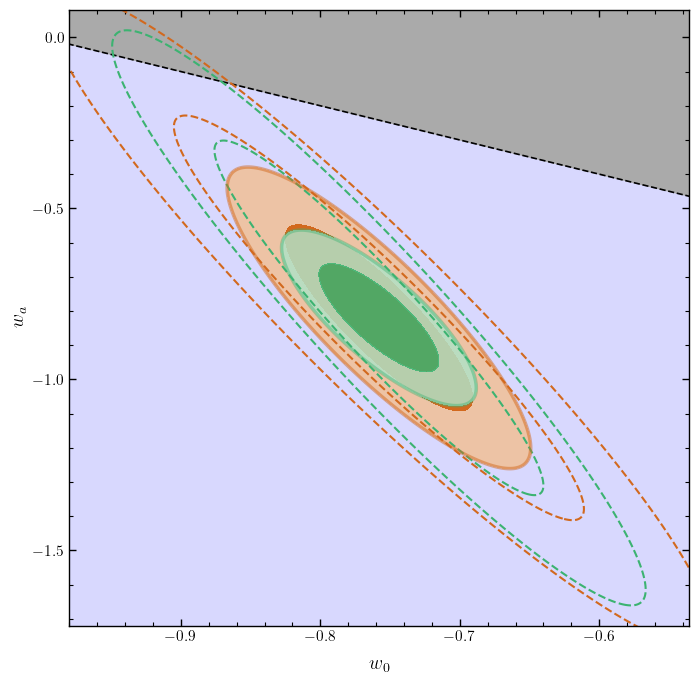

In [12]:
ploter.plot_2d(
    gauss2,
    param_pair=[r'$w_0$',r'$w_a$'],
    filled=True,
    colors=palette,
    lws=[1.5,1.5],
    legend_loc='upper right',
    ax=ax)
from IPython.display import display
display(fig)

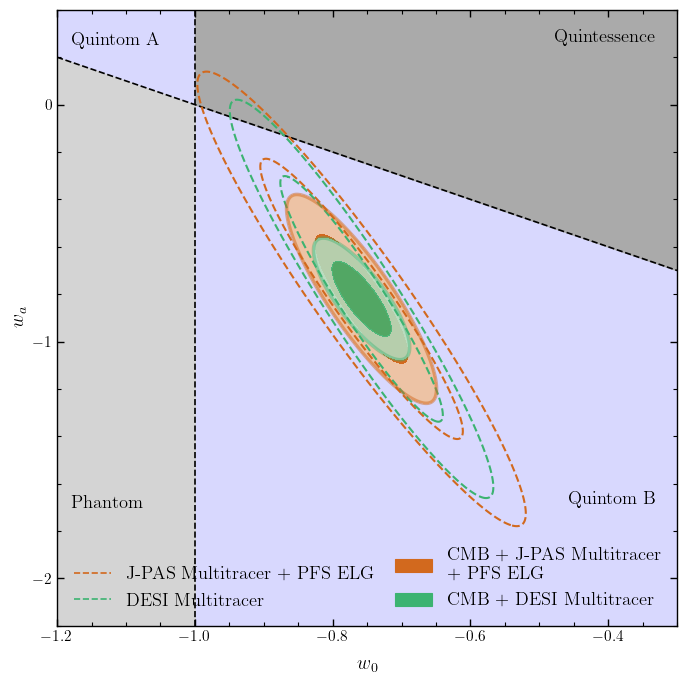

In [13]:
import matplotlib.patches as mpatches
fig.align_labels()
ax.set_xlim(xl,xr)
ax.set_ylim(yl,yr)
l1,=ax.plot([],[],color=palette[0],ls='--',label='J-PAS Multitracer + PFS ELG')
l2,=ax.plot([],[],color=palette[1],ls='--',label='DESI Multitracer')
p1=mpatches.Patch(color=palette[0],label='CMB + J-PAS Multitracer\n+ PFS ELG')
p2=mpatches.Patch(color=palette[1],label='CMB + DESI Multitracer')
legend=ax.legend(handles=[l1,l2],loc='lower left',frameon=False,fontsize='x-small')
ax.add_artist(legend)
ax.legend(handles=[p1,p2],loc='lower right',frameon=False,fontsize='x-small')
ax.text(-1.18,0.25,'Quintom A',size='x-small')
ax.text(-1.18,-1.7,'Phantom',size='x-small')
ax.text(-0.33,0.25,'Quintessence',size='x-small',horizontalalignment='right', verticalalignment='bottom')
ax.text(-0.33,-1.7,'Quintom B',size='x-small',horizontalalignment='right', verticalalignment='bottom')
display(fig)

In [ ]:
fig.savefig('../../code/fig/cmb-pelg-jmul-dmul-nonfid.pdf',bbox_inches='tight')

In [5]:
from scipy.spatial.distance import mahalanobis
r1=mahalanobis([-1,0],[settings.w0,settings.wa],np.linalg.inv(cov1_valid.loc[['w0','wa'],['w0','wa']].values))
r2=mahalanobis([-1,0],[settings.w0,settings.wa],np.linalg.inv(cov2_valid.loc[['w0','wa'],['w0','wa']].values))
r1,r2

(5.450896364217583, 8.66278715528716)

In [6]:
import mpmath
def chi_square_cdf(x):
    result = mpmath.gammainc(1, 0, x / 2, regularized=True)
    return result
mpmath.mp.dps = 30

In [7]:
p1=chi_square_cdf(r1**2)
p2=chi_square_cdf(r2**2)
p1,p2

(mpf('0.999999646766168355284830339978098'),
 mpf('0.999999999999999949367633548778382'))

In [10]:
from scipy.stats import chi2
chi2.cdf(5.991,2),chi_square_cdf(5.991)

(0.9499883849734209, mpf('0.94998838497342091038353057200533'))

In [11]:
def normal_cdf(x, mu=0, sigma=1):
    z = (x - mu) / (sigma * mpmath.sqrt(2))
    result = 0.5 * (1 + mpmath.erf(z))
    return result

In [18]:
(normal_cdf(2)-0.5)*2

mpf('0.954499736103641585599434725666896')

In [14]:
def P1(x):
    return mpmath.fabs(normal_cdf(x)-0.5)*2-p1
def P2(x):
    return mpmath.fabs(normal_cdf(x)-0.5)*2-p2

In [15]:
mpmath.findroot(P1,4)

mpf('5.09257450597781462926250353504561')

In [16]:
mpmath.findroot(P2,6)

mpf('8.38521676588977947091453280591831')